<a href="https://colab.research.google.com/github/adilsonvj/A-comparative-analysis-of-local-network-similarity-measurement/blob/main/Airbnb_Seattle_Dive_Deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

Planning your next trip could be at the same time **exciting** for the experience you will live but also **frustrating** when not aware of the right points to look at. 


This article will dive deep into the features that you need to pay attention to when looking for a place to stay and how hosts could improve the place for better review scoring.


On the dataset used we can see the listings from Airbnb for the city of Seatle - WA. Data were collected in April 2016 and the information is related to the host like verifications and response rate, and also from the place like amenities, prices, location, and property info.


Based on this, our research questions are:

* Does the features related to the host has importance in the experience and the review score? (e.g. being super host, verifications, etc..).

* Which region has the highest and lowest average daily price, number of places available, and review score?

* Which home feature has the highest importance to influence a good experience? (e.g. amenities, property type, room type, bed type, etc..).

Based on it, hosts would improve their places by knowing exactly what to focus aiming for better reviews. At the same time, guests would use the informations provided here to filter for the best place and have a better experience.

# Data understanding

As we can see below, the dataset has 3818 instances and 92 columns. Many of the columns are information that we will not use here like IDs, URLs and texts. Our focus in this work will be on the numerical and categorical variables that can (or not) be related to the review score.

In [ ]:
# !pip install --upgrade matplotlib

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
listings_df = pd.read_csv("listings.csv")

In [ ]:
listings_df.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [ ]:
print("Number of rows ", listings_df.shape[0],"\nNumber of columns ", listings_df.shape[1])

Number of rows  3818 
Number of columns  92


25 out of 91 features has more than 10% of the values as null which will need a pre processing in the next topic.

In [ ]:
(listings_df.isna().sum() / listings_df.shape[0]).sort_values(ascending = False).reset_index()

,index,0
0,license,1.000000
1,square_feet,0.974594
2,monthly_price,0.602672
3,security_deposit,0.511262
4,weekly_price,0.473808
5,notes,0.420639
6,neighborhood_overview,0.270299
7,cleaning_fee,0.269775
8,transit,0.244631
9,host_about,0.224987


In [ ]:
def dolar_format_to_int(x):
  try:
    return int(str(x).replace("$", "").replace(",", "").split(".")[0])
  except:
    None
for price_ in ["price", "security_deposit", "cleaning_fee", "extra_people"]:
  listings_df[price_] = listings_df[price_].apply(lambda x : dolar_format_to_int(x))

In [ ]:
from datetime import datetime
today_date = pd.to_datetime(datetime.today().strftime('%Y-%m-%d'))
listings_df["years_as_host"] = pd.to_datetime(listings_df["host_since"]
                                , infer_datetime_format=True).apply(lambda x : 
                                                        (today_date - x).days/365)

In [ ]:
def plot_distribution(df, column_name, bw_plot = 0.5, x_lim = (None, None)
                                                    , y_lim = (None, None)
                                                    , mean_pos = (None, None)
                                                    , std_pos = (None, None)):
  df[column_name].dropna().plot.kde(bw_method=bw_plot)
  if x_lim[0] != None:
    plt.xlim(x_lim[0], x_lim[1])
  if y_lim[0] != None:
    plt.ylim(y_lim[0], y_lim[1])
  plt.xlabel(str(column_name))
  if mean_pos[0] != None:
    plt.text(mean_pos[0], mean_pos[1], "Mean "+str(df[column_name].dropna().mean().round(1)))
    plt.text(std_pos[0], std_pos[1], "Std "+str(df[column_name].dropna().std().round(1)))
  plt.vlines(listings_df[column_name].dropna().mean(), 0, 1, 'r', '--')
  return plt.show()

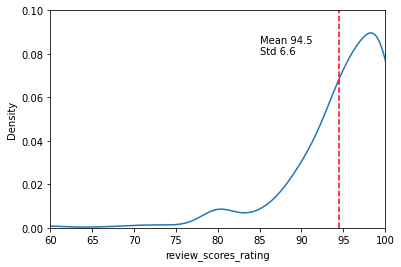

In [ ]:
plot_distribution(listings_df, "review_scores_rating", bw_plot = 0.3, x_lim = (60, 100)
                                                    , y_lim = (0, 0.1)
                                                    , mean_pos = (85, 0.085)
                                                    , std_pos = (85, 0.08))

We can see that most part of the reviews are positive ones, with an average of 94.5. Because of that, we will be using the multiplication of the average score by the average number of reviews by month. Then, the score was normalized between 0 and 10 to have a better understand of this value.

In [ ]:
listings_df["review_scores_rating"] = (listings_df["review_scores_rating"] * listings_df["reviews_per_month"]) / 10.0

listings_df["review_scores_rating"] = 10* ((listings_df["review_scores_rating"] - listings_df["review_scores_rating"].min())
/ (listings_df["review_scores_rating"].max() - listings_df["review_scores_rating"].min()))

listings_df["review_scores_rating"].fillna(0, inplace = True)

listings_df.drop("reviews_per_month", axis = 1, inplace = True)

<AxesSubplot:>

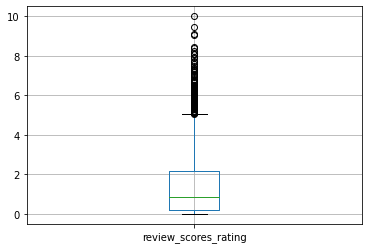

In [ ]:
listings_df.boxplot("review_scores_rating")

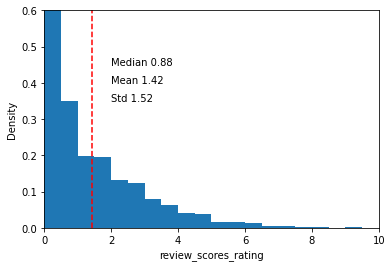

In [ ]:
plt.hist(listings_df["review_scores_rating"].tolist(), density = True, bins = 20)
plt.xlabel("review_scores_rating")
plt.ylabel("Density")
plt.vlines(listings_df["review_scores_rating"].mean(), 0, 10, color = 'red', linestyles = '--')
plt.text(2, .45, "Median " + str(listings_df["review_scores_rating"].dropna().median().round(2)))
plt.text(2, .4, "Mean " + str(listings_df["review_scores_rating"].dropna().mean().round(2)))
plt.text(2, .35, "Std " + str(listings_df["review_scores_rating"].dropna().std().round(2)))
plt.xlim(0, 10)
plt.ylim(0, .6)
plt.show()

Now, the average score is 1.42 with 1.52 of standard deviation.

Hosts in this dataset has at least 6 years of experience working in the platform, with almost 9 years being the average. This can help us explain the good scores that such experience raised the bar for the host quality.

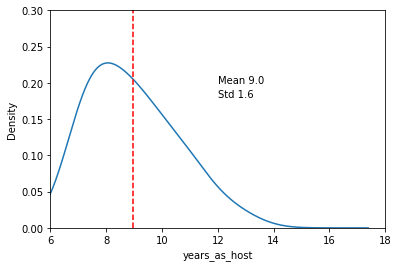

In [ ]:
plot_distribution(listings_df, "years_as_host", bw_plot = 0.5, x_lim = (6, 18)
                                                    , y_lim = (0, 0.3)
                                                    , mean_pos = (12, 0.2)
                                                    , std_pos = (12, 0.18))

We can see the proportion of the cleaning fee, daily price and security deposit being approximately 1:2:4.

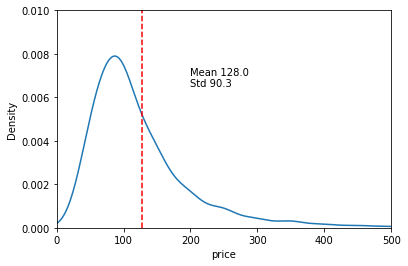

In [ ]:
plot_distribution(listings_df, "price", bw_plot = 0.2, x_lim = (0, 500)
                                                    , y_lim = (0, 0.01)
                                                    , mean_pos = (200, 0.007)
                                                    , std_pos = (200, 0.0065))

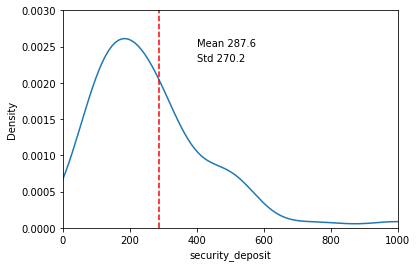

In [ ]:
plot_distribution(listings_df, "security_deposit", bw_plot = 0.3, x_lim = (0, 1000)
                                                    , y_lim = (0, 0.003)
                                                    , mean_pos = (400, 0.0025)
                                                    , std_pos = (400, 0.0023))

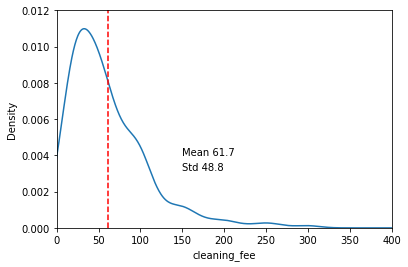

In [ ]:
plot_distribution(listings_df, "cleaning_fee", bw_plot = 0.3, x_lim = (0, 400)
                                                    , y_lim = (0, 0.012)
                                                    , mean_pos = (150, 0.004)
                                                    , std_pos = (150, 0.0032))

## Host

**Host response time**: We can see below that more than 80% of the hosts take on average a few hours to respond to customers. Represented a better average score, 2.02, and positive correlation, 0.35, when done in less than an hour. And negative correlations and below average otherwise.

**Host is super host**: Besides the fact that only 24% of the hosts are super hosts, this attribute has a correlation of 0.33 with the score. Being one of the highest (positive) correlations and has a considerably better score average when compared to non super hosts (2.41 x 1.17).

**Host identity verified**: For the host identity verification, we can see a similar case. 0.14 correlation when verified with a better average (1.53 vs 1.02).

**Cancellation policy**: For a moderate cancelation policy, the correlation is better with 0.16, and also a better average of 1.76.


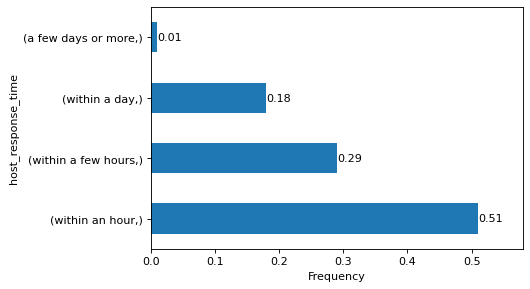

In [ ]:
plt.figure(figsize=(6, 4), dpi = 80)
ax = (listings_df[["host_response_time"]].value_counts(normalize = True)
                .round(2).plot.barh())
ax.bar_label(ax.containers[0])
ax.set_xlim(0, 0.58)
ax.set_xlabel("Frequency")
plt.show()

In [ ]:
def comp_corr_mean_target(df, col_to_comp):
  
  cm = sns.light_palette("green", as_cmap=True)
  temp_df = df[[col_to_comp, "review_scores_rating"]].dropna(how = "any", axis = 0)
  
  mean_df = temp_df.groupby(col_to_comp).mean().reset_index()
  mean_df.columns = [col_to_comp, "avg_review_scores_rating"]

  dummies = pd.get_dummies(df[col_to_comp], drop_first = False, dummy_na = False)
  corr_comp = (pd.concat([dummies, df["review_scores_rating"]], axis = 1).dropna(subset = ["review_scores_rating"], how = "any", axis = 0)
                      .corr()["review_scores_rating"]
                      .reset_index()
                      .sort_values("review_scores_rating", ascending = False)
                      .reset_index(drop = True)
                      .iloc[1::, :])
  corr_comp.columns = [col_to_comp, "corr_review_scores_rating"]

  count_col = temp_df[col_to_comp].value_counts().reset_index()
  count_col.columns = [col_to_comp, "count_"+col_to_comp]

  corr_comp = corr_comp.merge(count_col, on = col_to_comp, how = "left")

  return corr_comp.merge(mean_df).sort_values("avg_review_scores_rating"
                                                          , ascending = False).round(2)\
  .style\
  .format('{:.2f}', na_rep="", subset = ["avg_review_scores_rating", "corr_review_scores_rating"])\
  .bar(subset = "corr_review_scores_rating", align = "mid", color = "#2aa6b0")\
  .background_gradient(cmap=cm, subset = ["avg_review_scores_rating", "count_"+col_to_comp])

In [ ]:
comp_corr_mean_target(listings_df, "host_response_time")

,host_response_time,corr_review_scores_rating,count_host_response_time,avg_review_scores_rating
0,within an hour,0.35,1692,2.02
1,within a few hours,-0.05,968,1.30
3,within a day,-0.16,597,0.85
2,a few days or more,-0.06,38,0.55


In [ ]:
comp_corr_mean_target(listings_df, "host_is_superhost")

,host_is_superhost,corr_review_scores_rating,count_host_is_superhost,avg_review_scores_rating
0,t,0.33,778,2.41
1,f,-0.33,3038,1.17


In [ ]:
comp_corr_mean_target(listings_df, "host_has_profile_pic")

,host_has_profile_pic,corr_review_scores_rating,count_host_has_profile_pic,avg_review_scores_rating
0,t,0.03,3809,1.42
1,f,-0.02,7,0.70


In [ ]:
comp_corr_mean_target(listings_df, "host_identity_verified")

,host_identity_verified,corr_review_scores_rating,count_host_identity_verified,avg_review_scores_rating
0,t,0.14,2997,1.53
1,f,-0.14,819,1.02


In [ ]:
comp_corr_mean_target(listings_df, "cancellation_policy")

,cancellation_policy,corr_review_scores_rating,count_cancellation_policy,avg_review_scores_rating
0,moderate,0.16,1251,1.76
1,strict,-0.02,1417,1.38
2,flexible,-0.14,1150,1.09


## Region
When diving into the region attributes we can see that Ballard and Downtown are the ones with the best correlation, 0.06. For the best score average, Seward Park, Ballard, and Beacon Hill are the top 3.  University District is one with the most negative correlation of -0.06 and the lowest score average of 0.97.

Downtown appears as one of the most expensive daily prices, 154.4 USD, and together with other regions has the highest maximum value of 999/1,000 USD. Queen Anne is the region with the cheapest place available, 20 USD, but with the second highest daily average, 157.2 USD. In terms of the number of places available, other regions lead the ranking with 794, Capitol Hill in second place with 567, and Downtown in third with 530.








In [ ]:
import numpy as np

listings_df[["neighbourhood_group_cleansed", "price"]]\
  .dropna(how = "any", axis = 0)\
  .groupby('neighbourhood_group_cleansed')\
  .agg(['mean', 'min', 'max', 'count'])\
  ["price"].sort_values("mean", ascending = False)\
  .round(1)

,mean,min,max,count
neighbourhood_group_cleansed,,,,
Magnolia,177.7,30,950,61
Queen Anne,157.2,20,975,295
Downtown,154.4,35,999,530
West Seattle,141.4,30,495,203
Cascade,140.1,42,775,89
Capitol Hill,130.6,22,750,567
Central Area,128.3,35,500,369
Ballard,124.7,25,475,230
Other neighborhoods,120.0,25,1000,794


In [ ]:
comp_corr_mean_target(listings_df, "neighbourhood_group_cleansed") 		

,neighbourhood_group_cleansed,corr_review_scores_rating,count_neighbourhood_group_cleansed,avg_review_scores_rating
4,Seward Park,0.03,44,1.88
0,Ballard,0.06,230,1.78
3,Beacon Hill,0.04,118,1.73
2,Rainier Valley,0.04,159,1.72
1,Downtown,0.06,530,1.65
5,Central Area,0.03,369,1.57
7,Delridge,0.01,79,1.48
6,Queen Anne,0.01,295,1.48
8,Interbay,-0.00,11,1.35
9,Capitol Hill,-0.03,567,1.33


# Property
In terms of property types, a Yurt has the highest score ratings but only one place available. The cabin is the second one with a 2.87 average score, and the highest positive correlation of 0.07, however, only 21 places are available. The curious fact here is between apartment and house, with the same absolute values but positive and negative correlations, and 1.45 versus 1.38 average scores respectively. 

For the room type, the private room showed the best correlation (0.07) and the highest average (1.58). And for the bed, the Pull-out sofa (really?) had the best correlation (0.03) and average score (1.76).

**For a positive experience**:
Essential amenities, shampoo, hair dryer, and iron, are part of the first group with the highest correlation and average score. 
Curiously, a smoke detector, first aid kit, carbon monoxide detector, and fire extinguisher are part of the second one. This makes sense, security is a good way to improve the experience. Extras like WiFi, breakfast, and 24-hour check-in are part of the third group.

**For a negative experience:** Washer, dryer, and kitchen, have the lowest scores and highest negative correlation. However, having nothing as amenities is the worst correlation -0.07, and the lowest score of 0.47.

In [ ]:
comp_corr_mean_target(listings_df, "property_type")

,property_type,corr_review_scores_rating,count_property_type,avg_review_scores_rating
3,Yurt,0.03,1,4.11
0,Cabin,0.07,21,2.87
2,Camper/RV,0.04,13,2.52
1,Loft,0.04,40,2.06
6,Dorm,0.01,2,1.95
4,Other,0.02,22,1.91
5,Apartment,0.02,1708,1.45
12,House,-0.02,1733,1.38
7,Bungalow,-0.01,13,1.26
11,Townhouse,-0.02,118,1.25


In [ ]:
comp_corr_mean_target(listings_df, "room_type")

,room_type,corr_review_scores_rating,count_room_type,avg_review_scores_rating
0,Private room,0.07,1160,1.58
2,Entire home/apt,-0.05,2541,1.36
1,Shared room,-0.04,117,1.06


In [ ]:
comp_corr_mean_target(listings_df, "bed_type")

,bed_type,corr_review_scores_rating,count_bed_type,avg_review_scores_rating
0,Pull-out Sofa,0.03,47,1.76
1,Real Bed,0.01,3657,1.42
2,Futon,-0.02,74,1.24
3,Airbed,-0.02,27,1.11
4,Couch,-0.03,13,0.69


In [ ]:
def get_one_hot_vector(df, col_to_one_hot = "amenities"):
  amem_all = []
  for amem_string in df[col_to_one_hot].tolist():
    amem_list = amem_string.replace("{", "").replace("}", "").replace('"', "").split(",")
    for amem_ in amem_list:
      if amem_ == '': amem_all.append('Nothing')
      else: amem_all.append(amem_)
  amem_all_list = list(set(amem_all))
  amem_df = pd.DataFrame(0, columns = amem_all_list, index = df.index)
  for i, amem_string in enumerate(df[col_to_one_hot].tolist()):
    amem_list = amem_string.replace("{", "").replace("}", "").replace('"', "").split(",")
    for amem_ in amem_list:
      if amem_ == '': 
        amem_df.loc[i, "Nothing"] = 1
      else: 
        amem_df.loc[i, amem_] = 1
  return amem_df

In [ ]:
amem_df = get_one_hot_vector(listings_df, col_to_one_hot = "amenities")

In [ ]:
amem_df = pd.concat([amem_df, listings_df["review_scores_rating"]], axis = 1)
corr_amem_df = (amem_df
            .dropna(subset = ["review_scores_rating"], how = "any", axis = 0)
            .corr()["review_scores_rating"].sort_values(ascending = False).reset_index()
            .reset_index(drop = True).iloc[1::, :]
            )
corr_amem_df.columns = ["index", "corr_review_scores_rating"]
mean_amem_list = []
count_amem_list = []
for idx in corr_amem_df["index"].tolist():
  df_amem_df = amem_df[amem_df[idx] == 1]["review_scores_rating"].dropna().copy()
  mean_amem_list.append(df_amem_df.mean())
  count_amem_list.append(df_amem_df.shape[0])
corr_amem_df["avg_review_scores_rating"] = mean_amem_list
corr_amem_df["count_amenity"] = count_amem_list

In [ ]:
cm = sns.light_palette("green", as_cmap=True)
corr_amem_df\
.style\
.format('{:.2f}', na_rep="", subset = ["avg_review_scores_rating", "corr_review_scores_rating"])\
.bar(subset = "corr_review_scores_rating", align = "mid", color = "#2aa6b0")\
.background_gradient(cmap=cm, subset = ["avg_review_scores_rating", "count_amenity"])

,index,corr_review_scores_rating,avg_review_scores_rating,count_amenity
1,Shampoo,0.22,1.63,2670
2,Essentials,0.17,1.53,3237
3,Smoke Detector,0.12,1.49,3281
4,First Aid Kit,0.11,1.61,1680
5,Carbon Monoxide Detector,0.11,1.54,2485
6,Hair Dryer,0.10,1.72,774
7,Wireless Internet,0.09,1.45,3667
8,Iron,0.09,1.69,742
9,Heating,0.08,1.45,3627
10,Breakfast,0.07,1.79,291


# Data preparation

Now that we analyzed the data we will be preprocessed it to use it in a machine learning model and study its parameters. 
First, we will select only columns that can have some relationship with the score, like years as host, host response time, number of bathrooms and beds, and bedroom type.
 
Then, checking the proportion of null values we can see that the security deposit and cleaning fee has the highest number of nulls, this can be because most of the places don't charge guests for it, so we will fill them with zero. For other numerical columns, we will fill with the mean, and use the dummy variables for categoricals, preserving the first column and having a dummy for null values.

Amenities were separated using a one-hot-vector approach, having 1 for the amenities in the place and 0 otherwise.

The final dataset had 3818 rows and 117 columns. Being 3436 rows on the training set and 382 for the test. 




In [ ]:
columns_to_use = ["years_as_host", "host_response_time", "host_is_superhost"
      , "host_listings_count", "host_has_profile_pic", "host_identity_verified"
      , "neighbourhood_group_cleansed", "property_type", "room_type", "price"
      , "accommodates", "bathrooms", "bedrooms", "beds", "bed_type", "amenities"
      , "security_deposit", "cleaning_fee", "guests_included", "extra_people"
      , "review_scores_rating", "cancellation_policy"]

df = listings_df[columns_to_use]

In [ ]:
(df.isna().sum() / df.shape[0]).sort_values(ascending = False).reset_index()

,index,0
0,security_deposit,0.511262
1,cleaning_fee,0.269775
2,host_response_time,0.136983
3,bathrooms,0.004191
4,bedrooms,0.001572
5,years_as_host,0.000524
6,host_identity_verified,0.000524
7,host_has_profile_pic,0.000524
8,host_listings_count,0.000524
9,host_is_superhost,0.000524


In [ ]:
amenities_df = get_one_hot_vector(listings_df, col_to_one_hot = "amenities")
amenities_df["count_amenities"] = amenities_df.sum(axis = 1)
df.drop("amenities", axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df[["cleaning_fee", "security_deposit"]] = df[["cleaning_fee", "security_deposit"]].fillna(0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value


In [ ]:
num_cols_list = df.select_dtypes(include = ["int", "float"]).columns.tolist()
obj_cols_list = df.select_dtypes(include = ["object"]).columns.tolist()

for col_ in num_cols_list:
  if col_ == "review_scores_rating": 
    continue
    
  df[col_] = df[col_].fillna(df[col_].mean())

for col_ in obj_cols_list:
  dummies = pd.get_dummies(df[col_], prefix = col_, prefix_sep = "_"
                                                          , dummy_na = True
                                                          , drop_first = False)
  df = pd.concat([df.drop(col_, axis = 1), dummies], axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df = pd.concat([amenities_df, df], axis = 1)

In [ ]:
df.dropna(subset = ["review_scores_rating"], how = "any", axis  = 0, inplace = True)

In [ ]:
X = df.drop("review_scores_rating", axis = 1)
y = df["review_scores_rating"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, shuffle = True)

In [ ]:
print("X train shape ", X_train.shape, " y train shape", y_train.shape)
print("X test shape ", X_test.shape, " y test shape", y_test.shape)

X train shape  (3436, 117)  y train shape (3436,)
X test shape  (382, 117)  y test shape (382,)


# Modeling





The model we decided to use was ElasticNet, mixing the use of L1 and L2 regularization in the linear regression. Here we used a grid search approach ranging the max iteration from 30 to 60, alpha between 0.0001 and 10000, and l1 ratio between 0.5 and 1, using the 5-fold cross-validation.

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_pipeline = Pipeline([("scaler", StandardScaler(with_mean = True)), ("elastic", ElasticNet())])

parametersGrid = {"elastic__max_iter": [30, 40, 50, 60],
                      "elastic__alpha": [1/10000, 1/1000, 1/100, 1/10, 1, 10, 100, 1000, 10000],
                      "elastic__l1_ratio": np.arange(0.5, 1.0, 0.05)}

elastic_model = GridSearchCV(elastic_pipeline
                             , parametersGrid
                             , n_jobs = -1
                             , scoring = "r2"
                             , cv = 5
                             , return_train_score = True
                             , verbose = 1)

elastic_model.fit(X_train, y_train)

print("Best parameter (CV score = %0.3f):" % elastic_model.best_score_)
print(elastic_model.best_params_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best parameter (CV score = 0.319):
{'elastic__alpha': 0.01, 'elastic__l1_ratio': 0.9500000000000004, 'elastic__max_iter': 40}


# Evaluation
Using an ElasticNet model with a grid search approach for the hyperparameters found an alpha of 0.01, l1 ratio of 0.95, and maximum iteration of 40. Training the model using those parameters we reached an R2 score of 0.35 on the training and 0.33 on the test.

In [ ]:
from sklearn.metrics import r2_score

elastic_pipeline = Pipeline([("scaler", StandardScaler(with_mean = True))
    , ("elastic", ElasticNet(alpha = 0.01, l1_ratio = 0.95, max_iter = 40))])

elastic_model = elastic_pipeline.fit(X_train, y_train)

y_pred_test = elastic_model.predict(X_test)
y_pred_train = elastic_model.predict(X_train)

err_test = r2_score(y_test, y_pred_test)
err_train = r2_score(y_train, y_pred_train)

print("Training R2 Score: ", err_train)
print("Testing R2 Score: ", err_test)

Training R2 Score:  0.349551111630811
Testing R2 Score:  0.33196794430174803


# Deployment





Verifying the most important coefficients of the model we can see that responding in less than an hour or just a few hours, being in the Downtown or Ballard region, and having the main amenities like shampoo, essentials, and smoke detectors, are the main features for a good experience.

On the opposite side, not being a super host or not having identity verified, being in a condominium, and flexible cancellation policy are the main negative ones.

In the end, if you are a guest trying to find a place in Seattle, Ballard or Downtown is the best region if you don't mind paying more for it. Pay attention to the time the host takes to answer your questions, if more than a few hours maybe you should look outside... Run away from non-super hosts and avoid non-verified ones. Shampoo, essentials, and other security items are one of the most important amenities for a good experience.

If you are a host and want to improve the user experience, try urgently to get your super host certification. Offer shampoo, essentials, and security items like smoke and carbon detector, as part of the amenities. Avoid using a flexible cancellation policy, but instead, use the moderate one.

In [ ]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(
      estimator = ElasticNet(alpha = 0.01, l1_ratio = 0.95, max_iter = 40)
  ).fit(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.381e-01, tolerance: 9.555e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
data_list = zip(selector.feature_names_in_, selector.estimator_.coef_, abs(selector.estimator_.coef_))

pd.DataFrame(data_list, columns = ["Column", "Coefficient", "Absolute Coefficient"])\
.sort_values("Absolute Coefficient", ascending = False)\
.reset_index(drop = True)\
.query("`Absolute Coefficient` > 0.1")[["Column", "Coefficient"]]

,Column,Coefficient
0,host_response_time_within an hour,1.080344
1,host_is_superhost_f,-0.594273
2,neighbourhood_group_cleansed_Downtown,0.530683
3,Dryer,-0.409157
4,host_response_time_within a few hours,0.371679
5,property_type_Condominium,-0.332947
6,Shampoo,0.292153
7,Free Parking on Premises,-0.269600
8,Kitchen,-0.255955
9,Essentials,0.221664
